### <span style="color:Green"> BoomBikes- Bike Sharing Company: Case Study  </span>

##### Business question
BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. They aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have contracted a consulting company to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

*
Which variables are significant in predicting the demand for shared be
* .
How well those variables describe the bike demands

In [1203]:
# Importing all required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#library required to group data into test & train data
from sklearn.model_selection import train_test_split

# library required to normalise the numarical variables 
from sklearn.preprocessing import MinMaxScaler

#importing statsmodels
import statsmodels.api as sm

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# for model evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Suppressing warnings for certain visuals which are deprecated

import warnings
warnings.filterwarnings("ignore")



#### <span style="color:blue"> Data Understanding, Preparation & EDA  </span>

##### 1. Understanding Data & EDA

In [1206]:
#Read-dataframe
data = pd.read_csv("day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1207]:
# Retriving high-level summary of the dataframe.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


💡 **Observation**
* The dataset has 730 rows and 15 columns
* Data are of datatype int, object and float64
* There are no null values.
* Seems like instant, dteday, atemp, casual & registered need to be dropped.

##### 2. Data Cleaning

The dataframe has indicative numerical value for each season, year, weekday, mnth & weathersit which aren't easy to comprehend. So, imputing indicative numerical values with string values. (source = data dictonary) 

In [1211]:
# Creating seasons function
def seasons(x):
    if x==1:
        return "spring"
    elif x==2:
        return "summer"
    elif x==3:
        return "fall"
    else:
        return "winter"

In [1212]:
# Imputing the values 
data['season'] = data['season'].apply(seasons)

In [1213]:
# Creating weekdays function
def weekdays(x):
    if x==1:
        return "mon"
    elif x==2:
        return "tue"
    elif x==3:
        return "wed"
    elif x==4:
        return "thu"
    elif x==5:
        return "fri"
    elif x==6:
        return "sat"
    else:
        return "sun"

In [1214]:
# Imputing the values 
data['weekday'] = data['weekday'].apply(weekdays)

In [1215]:
# Creating weathersituation function
def weathersituation(x):
    if x==1:
        return "clear_sky"
    elif x==2:
        return "mist_cloudy"
    elif x==3:
        return "light_rain"
    else:
        return "heavy_rain"

In [1216]:
# Imputing the values 
data['weathersit'] = data['weathersit'].apply(weathersituation)

In [1217]:
# Creating months function
def months(x):
    if x==1:
        return "jan"
    elif x==2:
        return "feb"
    elif x==3:
        return "mar"
    elif x==4:
        return "apr"
    elif x==5:
        return "may"
    elif x==6:
        return "jun"
    elif x==7:
        return "jul"
    elif x==8:
        return "aug"
    elif x==9:
        return "sep"
    elif x==10:
        return "oct"
    elif x==11:
        return "nov"
    else:
        return "dec"

In [1218]:
# Imputing the values 
data['mnth'] = data['mnth'].apply(months)

In [1219]:
# Dropping unwanted features

data = data.drop(['instant','dteday','atemp','casual','registered'],axis=1)
print(f"➡️ After dropping columns, the dataframe has",data.shape[0], "rows and", data.shape[1],  "columns")

➡️ After dropping columns, the dataframe has 730 rows and 11 columns


In [1220]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,mist_cloudy,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,mist_cloudy,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear_sky,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear_sky,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear_sky,9.305237,43.6957,12.522300,1600


##### 3. EDA

###### <span style="color:Green"> 3.1 Univariate analysis </span>

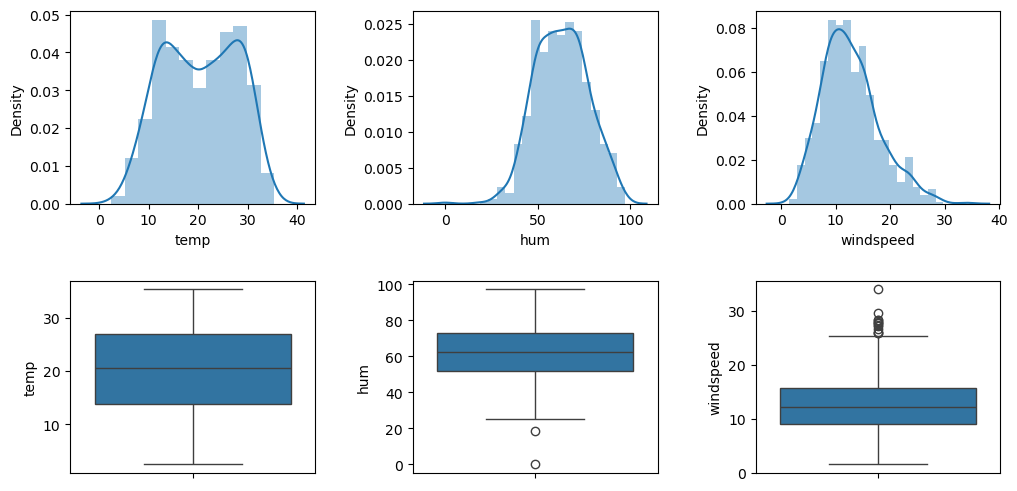

In [1223]:
plt.figure(figsize=(12,6))

plt.subplot(2,3,1)
sns.distplot(data.temp)
plt.subplots_adjust(wspace=0.4)

plt.subplot(2,3,2)
sns.distplot(data.hum)
plt.subplots_adjust(wspace=0.4)

plt.subplot(2,3,3)
sns.distplot(data.windspeed)
plt.subplots_adjust(hspace=0.4)
                   
plt.subplot(2,3,4)
sns.boxplot(data.temp)
plt.subplots_adjust(wspace=0.4)

plt.subplot(2,3,5)
sns.boxplot(data.hum)
plt.subplots_adjust(wspace=0.4)

plt.subplot(2,3,6)
sns.boxplot(data.windspeed)
plt.show()

###### <span style="color:Green"> 3.2 Bivariate analysis </span>

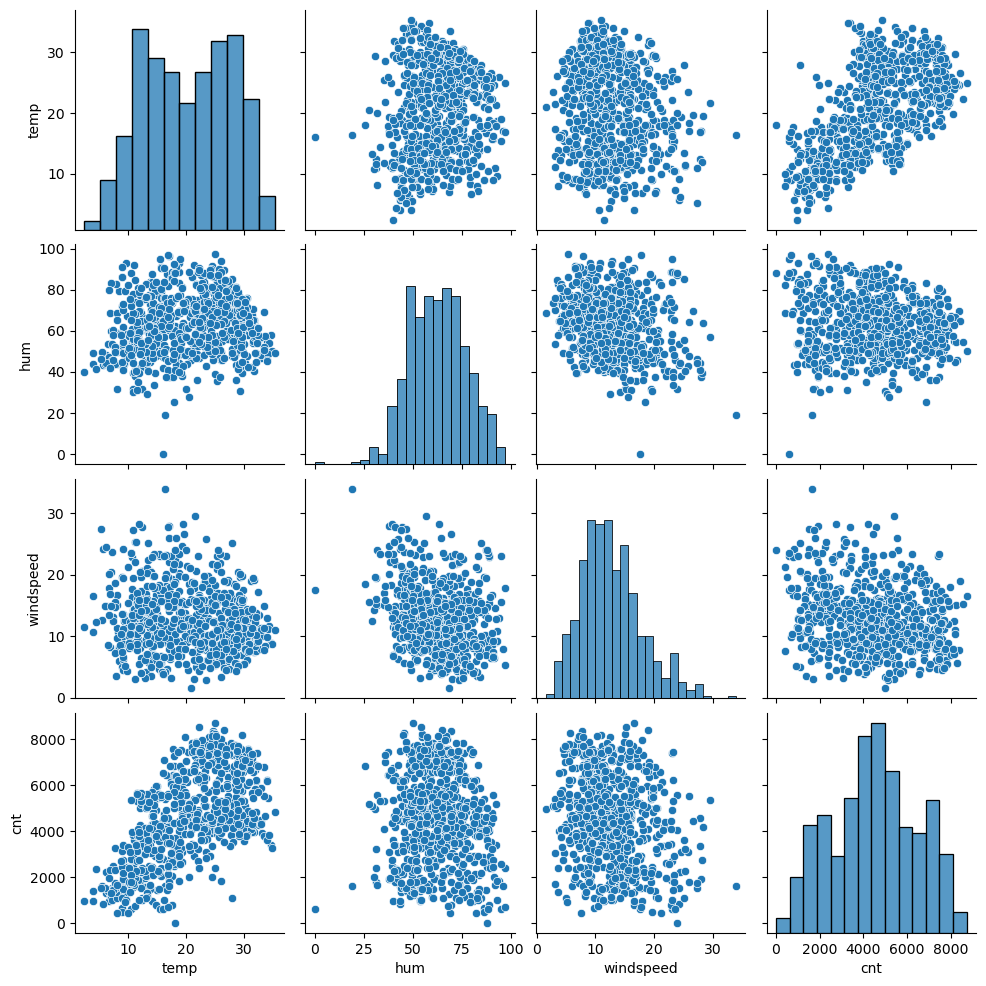

In [1225]:
# Numeric variables

num_data= data[["temp","hum","windspeed","cnt"]]
#sns.set_palette("Set3")
sns.pairplot(num_data)
plt.show()

In [1226]:
num_data.corr()

,temp,hum,windspeed,cnt
temp,1.000000,0.128565,-0.158186,0.627044
hum,0.128565,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.248506,1.000000,-0.235132
cnt,0.627044,-0.098543,-0.235132,1.000000


💡**Insight** :Variable `temp` has the highest correlation with the target variable.

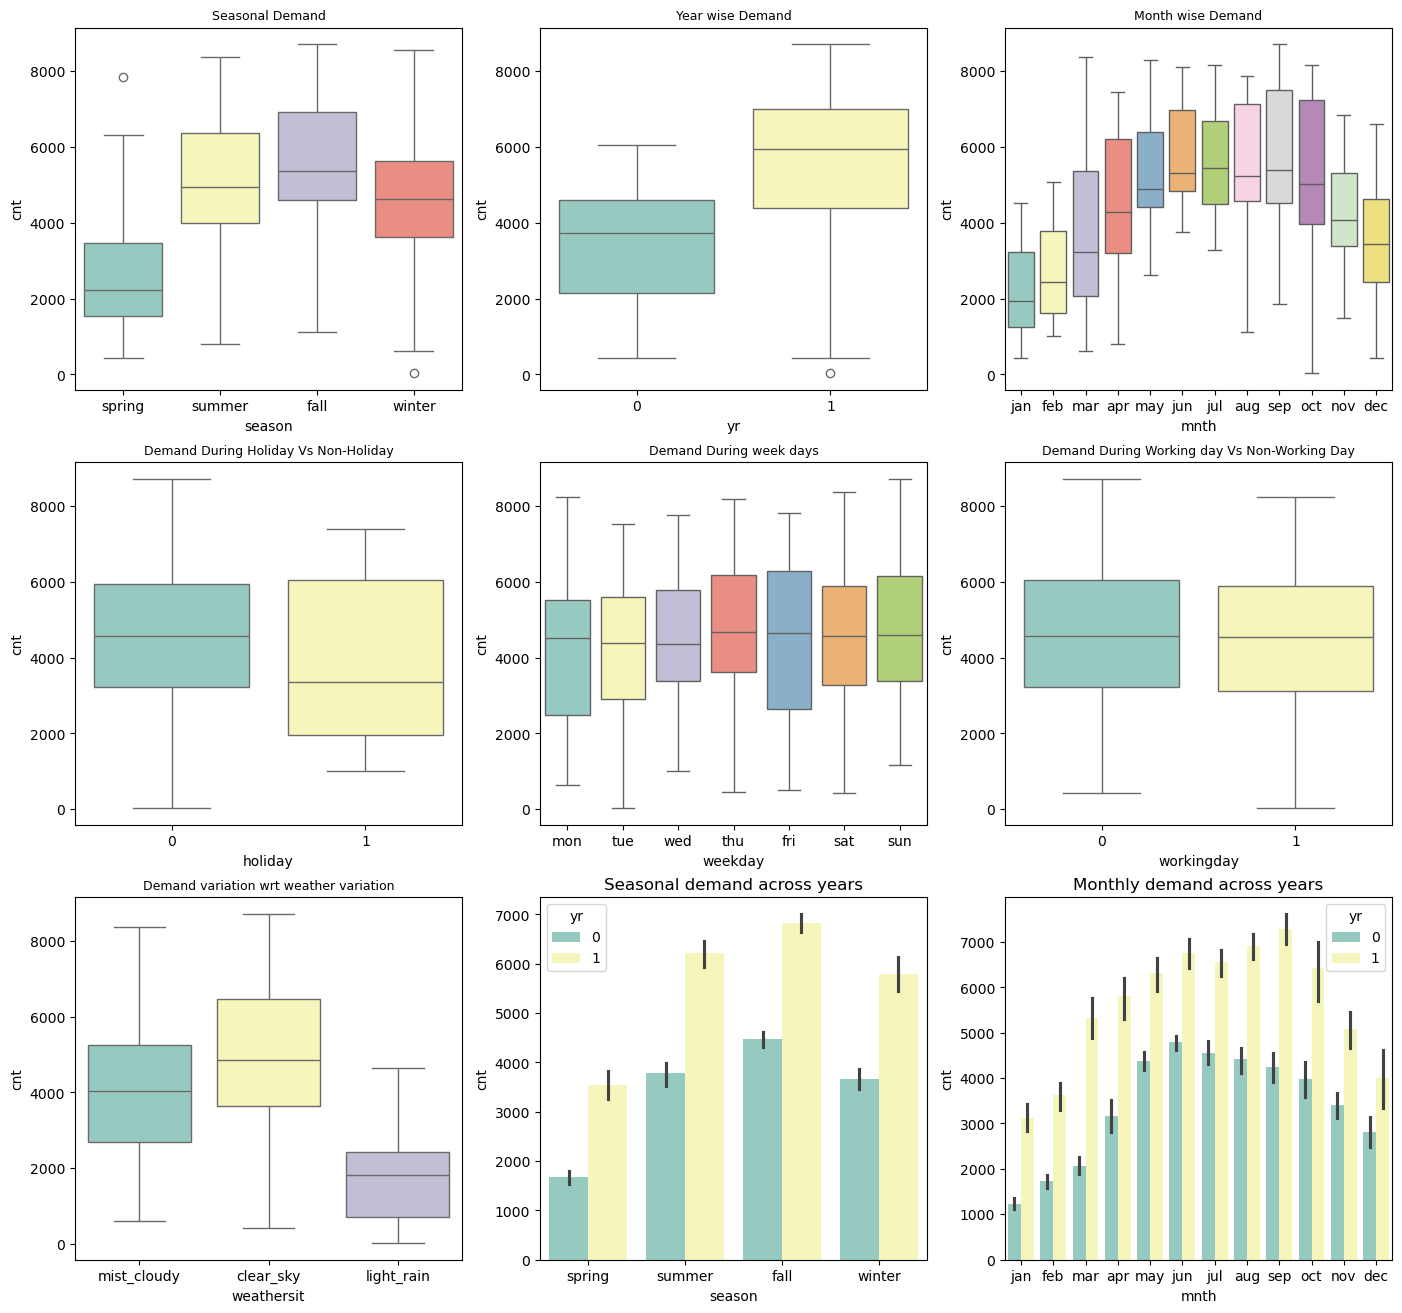

In [1228]:
# Taget Vs Categorical variables

plt.figure(figsize=(17,16))
plt.subplot(3,3,1)
sns.boxplot(data=data,x="season",y="cnt",palette="Set3",hue="season",legend=False)
plt.title("Seasonal Demand",fontsize=9)
plt.subplot(3,3,2)
sns.boxplot(data=data,x="yr",y="cnt",palette="Set3",hue="yr",legend=False)
plt.title("Year wise Demand", fontsize=9)
plt.subplot(3,3,3)
sns.boxplot(data=data,x="mnth",y="cnt",palette="Set3",hue="mnth",legend=False)
plt.title("Month wise Demand",fontsize=9)
plt.subplot(3,3,4)
sns.boxplot(data=data,x="holiday",y="cnt",palette="Set3",hue="holiday",legend=False)
plt.title("Demand During Holiday Vs Non-Holiday",fontsize=9)
plt.subplot(3,3,5)
sns.boxplot(data=data,x="weekday",y="cnt",palette="Set3",hue="weekday",legend=False)
plt.title("Demand During week days",fontsize=9)
plt.subplot(3,3,6)
sns.boxplot(data=data,x="workingday",y="cnt",palette="Set3",hue="workingday",legend=False)
plt.title("Demand During Working day Vs Non-Working Day",fontsize=9)
plt.subplot(3,3,7)
sns.boxplot(data=data,x="weathersit",y="cnt",palette="Set3",hue="weathersit",legend=False)
plt.title("Demand variation wrt weather variation",fontsize=9)
plt.subplot(3,3,8)
sns.barplot(data=data, y='cnt',x='season',hue='yr',palette='Set3' )
plt.title("Seasonal demand across years")
plt.subplot(3,3,9)
sns.barplot(data=data, y='cnt',x='mnth',hue='yr',palette='Set3' )
plt.title("Monthly demand across years")

plt.show()

###### <span style="color:Green"> 3.3 Multivariate analysis </span>

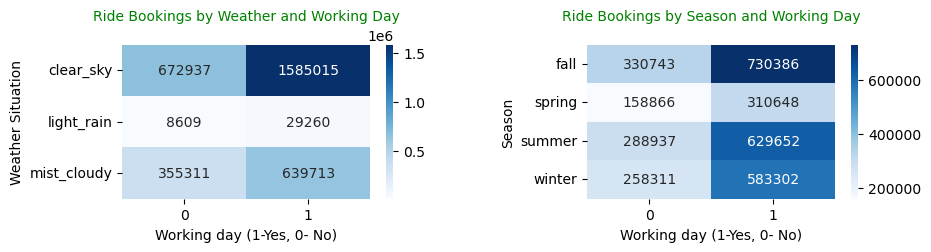

In [1230]:
# setting up canvas size for the visual
plt.figure(figsize=([10,2]))

plt.subplot(1,2,1)

# Creating a Pivot table
weather_work=pd.pivot_table(data=data, index="weathersit", columns="workingday", values="cnt",observed=False, aggfunc=lambda x: x.sum())

sns.heatmap(data=weather_work, cmap="Blues", fmt='d', annot=True)

#Adding labels and title
plt.xlabel('Working day (1-Yes, 0- No)')
plt.ylabel('Weather Situation')
plt.title("Ride Bookings by Weather and Working Day\n", fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Green'})
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,2,2)
# Creating a Pivot table
season_work=pd.pivot_table(data=data, index="season", columns="workingday", values="cnt",observed=False, aggfunc=lambda x: x.sum())

sns.heatmap(data=season_work, cmap="Blues", fmt='d', annot=True)

#Adding labels and title
plt.xlabel('Working day (1-Yes, 0- No)')
plt.ylabel('Season')
plt.title("Ride Bookings by Season and Working Day\n", fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

💡**Insight** : 
* People rent less if temperature is fall below 10 and rises above 30 degree celsius.
* When humidity lies within 60%, people has rented bike. The demand sharply fell when humity increased above 60%. 
* During fall, the demand for bikes was highest among all seasons. Perhaps the median, minimum and maximum number of bikes rented was higher in this season.
* The average number of bikes rentals increased by 1.5 times from 2018 to 2019.
* Considering monthly trend, Jun to Sep witnessed highest average booking. Lowest being in Jan & Feb.
* It seems like people rent bikes to commute to the workplace or office, but stay at home during holidays. The average booking remains the same for both working and non-working days (including Saturdays, Sundays, and holidays). Furthermore, if we explore the weekday trend, we see there is not much variation in average bookings as well. This signifies that people not only rent bikes to commute to their workplace but also often use them on weekends to either purchase commodities or travel short distances. Only during holidays is there a significant dip in demand for bikes.
* As we might intuitively guess, worsening weather conditions lead people to prefer staying at home, and the data confirms this. The average bike rentals tend to decrease when the weather is misty, cloudy, or lightly snowing. If it rains heavily, they don’t see any bookings.



##### 4. Data Preparation

###### <span style="color:Green"> 4.2 Creating Dummy features </span>

📖 `season column has following values 1:spring, 2:summer, 3:fall & 4:winter. We can convey information of all the four values through three distinct columns`

In [1235]:
# Creating and storing dummy variables from season column and dropping the first column 
seasontype=pd.get_dummies(data["season"],dtype=int,drop_first = True)

In [1236]:
# Concatinating the dummy variable with the dataframe
data= pd.concat([data,seasontype],axis=1)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,jan,0,mon,1,mist_cloudy,14.110847,80.5833,10.749882,985,1,0,0
1,spring,0,jan,0,tue,1,mist_cloudy,14.902598,69.6087,16.652113,801,1,0,0
2,spring,0,jan,0,wed,1,clear_sky,8.050924,43.7273,16.636703,1349,1,0,0
3,spring,0,jan,0,thu,1,clear_sky,8.200000,59.0435,10.739832,1562,1,0,0
4,spring,0,jan,0,fri,1,clear_sky,9.305237,43.6957,12.522300,1600,1,0,0


In [1237]:
# Dropping column season
data.drop('season',axis=1,inplace=True)
data.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,0,jan,0,mon,1,mist_cloudy,14.110847,80.5833,10.749882,985,1,0,0
1,0,jan,0,tue,1,mist_cloudy,14.902598,69.6087,16.652113,801,1,0,0
2,0,jan,0,wed,1,clear_sky,8.050924,43.7273,16.636703,1349,1,0,0
3,0,jan,0,thu,1,clear_sky,8.200000,59.0435,10.739832,1562,1,0,0
4,0,jan,0,fri,1,clear_sky,9.305237,43.6957,12.522300,1600,1,0,0


📖 As per metadata`weathersit` column has following variables: -

**1:** Clear, Few clouds, Partly cloudy, Partly cloudy

**2:** Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

**3:** Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

**4:** Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog Fog

In [1239]:
# Let's explore the count of value in weathersit variable
data.weathersit.value_counts()

weathersit
clear_sky      463
mist_cloudy    246
light_rain      21
Name: count, dtype: int64

💡No booking when it's heavyly raining 

In [1241]:
# Creating and storing dummy variables from weathersit column and drop the first column 
weathertype=pd.get_dummies(data["weathersit"],drop_first= True, dtype=int)

In [1242]:
# Concatinating the dummy variable with the dataframe
data= pd.concat([data,weathertype],axis=1)
data.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,light_rain,mist_cloudy
0,0,jan,0,mon,1,mist_cloudy,14.110847,80.5833,10.749882,985,1,0,0,0,1
1,0,jan,0,tue,1,mist_cloudy,14.902598,69.6087,16.652113,801,1,0,0,0,1
2,0,jan,0,wed,1,clear_sky,8.050924,43.7273,16.636703,1349,1,0,0,0,0
3,0,jan,0,thu,1,clear_sky,8.200000,59.0435,10.739832,1562,1,0,0,0,0
4,0,jan,0,fri,1,clear_sky,9.305237,43.6957,12.522300,1600,1,0,0,0,0


In [1243]:
# Dropping column weathersit
data.drop('weathersit',axis=1,inplace=True)
data.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,light_rain,mist_cloudy
0,0,jan,0,mon,1,14.110847,80.5833,10.749882,985,1,0,0,0,1
1,0,jan,0,tue,1,14.902598,69.6087,16.652113,801,1,0,0,0,1
2,0,jan,0,wed,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0
3,0,jan,0,thu,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0
4,0,jan,0,fri,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0


📖 As per metadata`mnth` column has representation of all the monthsas per gregorian calander.

In [1245]:
# Creating and storing dummy variables from yr column and dropping the first column 
months=pd.get_dummies(data["mnth"],dtype=int,drop_first = True)

In [1246]:
# Concatinating the dummy variable with the dataframe
data= pd.concat([data,months],axis=1)

In [1247]:
# Dropping column mnth
data.drop('mnth',axis=1,inplace=True)
data.head()

,yr,holiday,weekday,workingday,temp,hum,windspeed,cnt,spring,summer,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,mon,1,14.110847,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,tue,1,14.902598,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,wed,1,8.050924,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,thu,1,8.200000,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,fri,1,9.305237,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


###### <span style="color:Green"> 4.3 Feature Engineering </span>

In [1249]:
# Creating new feature weekend from weekday feature
data['weekend']=data.weekday.apply(lambda row: 1 if row =="sat" or row =="sun" else 0)

In [1250]:
# Dropping column weekday
data.drop("weekday",axis=1,inplace=True)

In [1251]:
data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,feb,jan,jul,jun,mar,may,nov,oct,sep,weekend
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,1,0,0,0,0,0,0,0,0


`Temperature-Humidity Index (THI)` measures the combined effect of temperature and humidity. It's commonly used to assess the risk of heat stress in both humans and animals. The THI takes into account both the ambient temperature and the relative humidity to provide a single value that indicates the level of **heat stress**

In [1253]:
# Creating new feature Temperature-Humidity Index (THI)
data['THI'] = data.apply(lambda row:row['temp']-(0.55-0.0055*row['hum'])*(row['temp']-14.5),axis=1)

In [1254]:
data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,jan,jul,jun,mar,may,nov,oct,sep,weekend,THI
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,1,0,0,0,0,0,0,0,0,14.152405
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,1,0,0,0,0,0,0,0,0,14.835303
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,1,0,0,0,0,0,0,0,0,10.046912
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,1,0,0,0,0,0,0,0,0,9.619143
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,1,0,0,0,0,0,0,0,0,10.913918


###### <span style="color:Green"> 4.4 Spliting dataset </span>

In [1256]:
# Splitting the Data into Training and Testing Sets
np.random.seed(0)
data_train, data_test = train_test_split(data, train_size =0.7, random_state=100)

In [1257]:
data_train.shape

(510, 25)

###### <span style="color:Green"> 4.5 Rescaling Features </span>

In [1259]:
# Creating an object scaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ["temp","hum","windspeed","cnt"]

data_train[num_vars] = scaler.fit_transform(data_train[num_vars])

data_train.head()


,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,jan,jul,jun,mar,may,nov,oct,sep,weekend,THI
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,1,0,0,0,0,0,0,0,26.847252
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,1,16.464056
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,0,0,0,11.628903
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,1,15.178522
111,0,0,0,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,1,13.906960


In [1260]:
data_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,jan,jul,jun,mar,may,nov,oct,sep,weekend,THI
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.266667,19.060429
std,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.442651,5.897301
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.409312
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.804869
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.073963
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,24.346811
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.101243


#### <span style="color:blue"> Model building and Evaluation  </span>

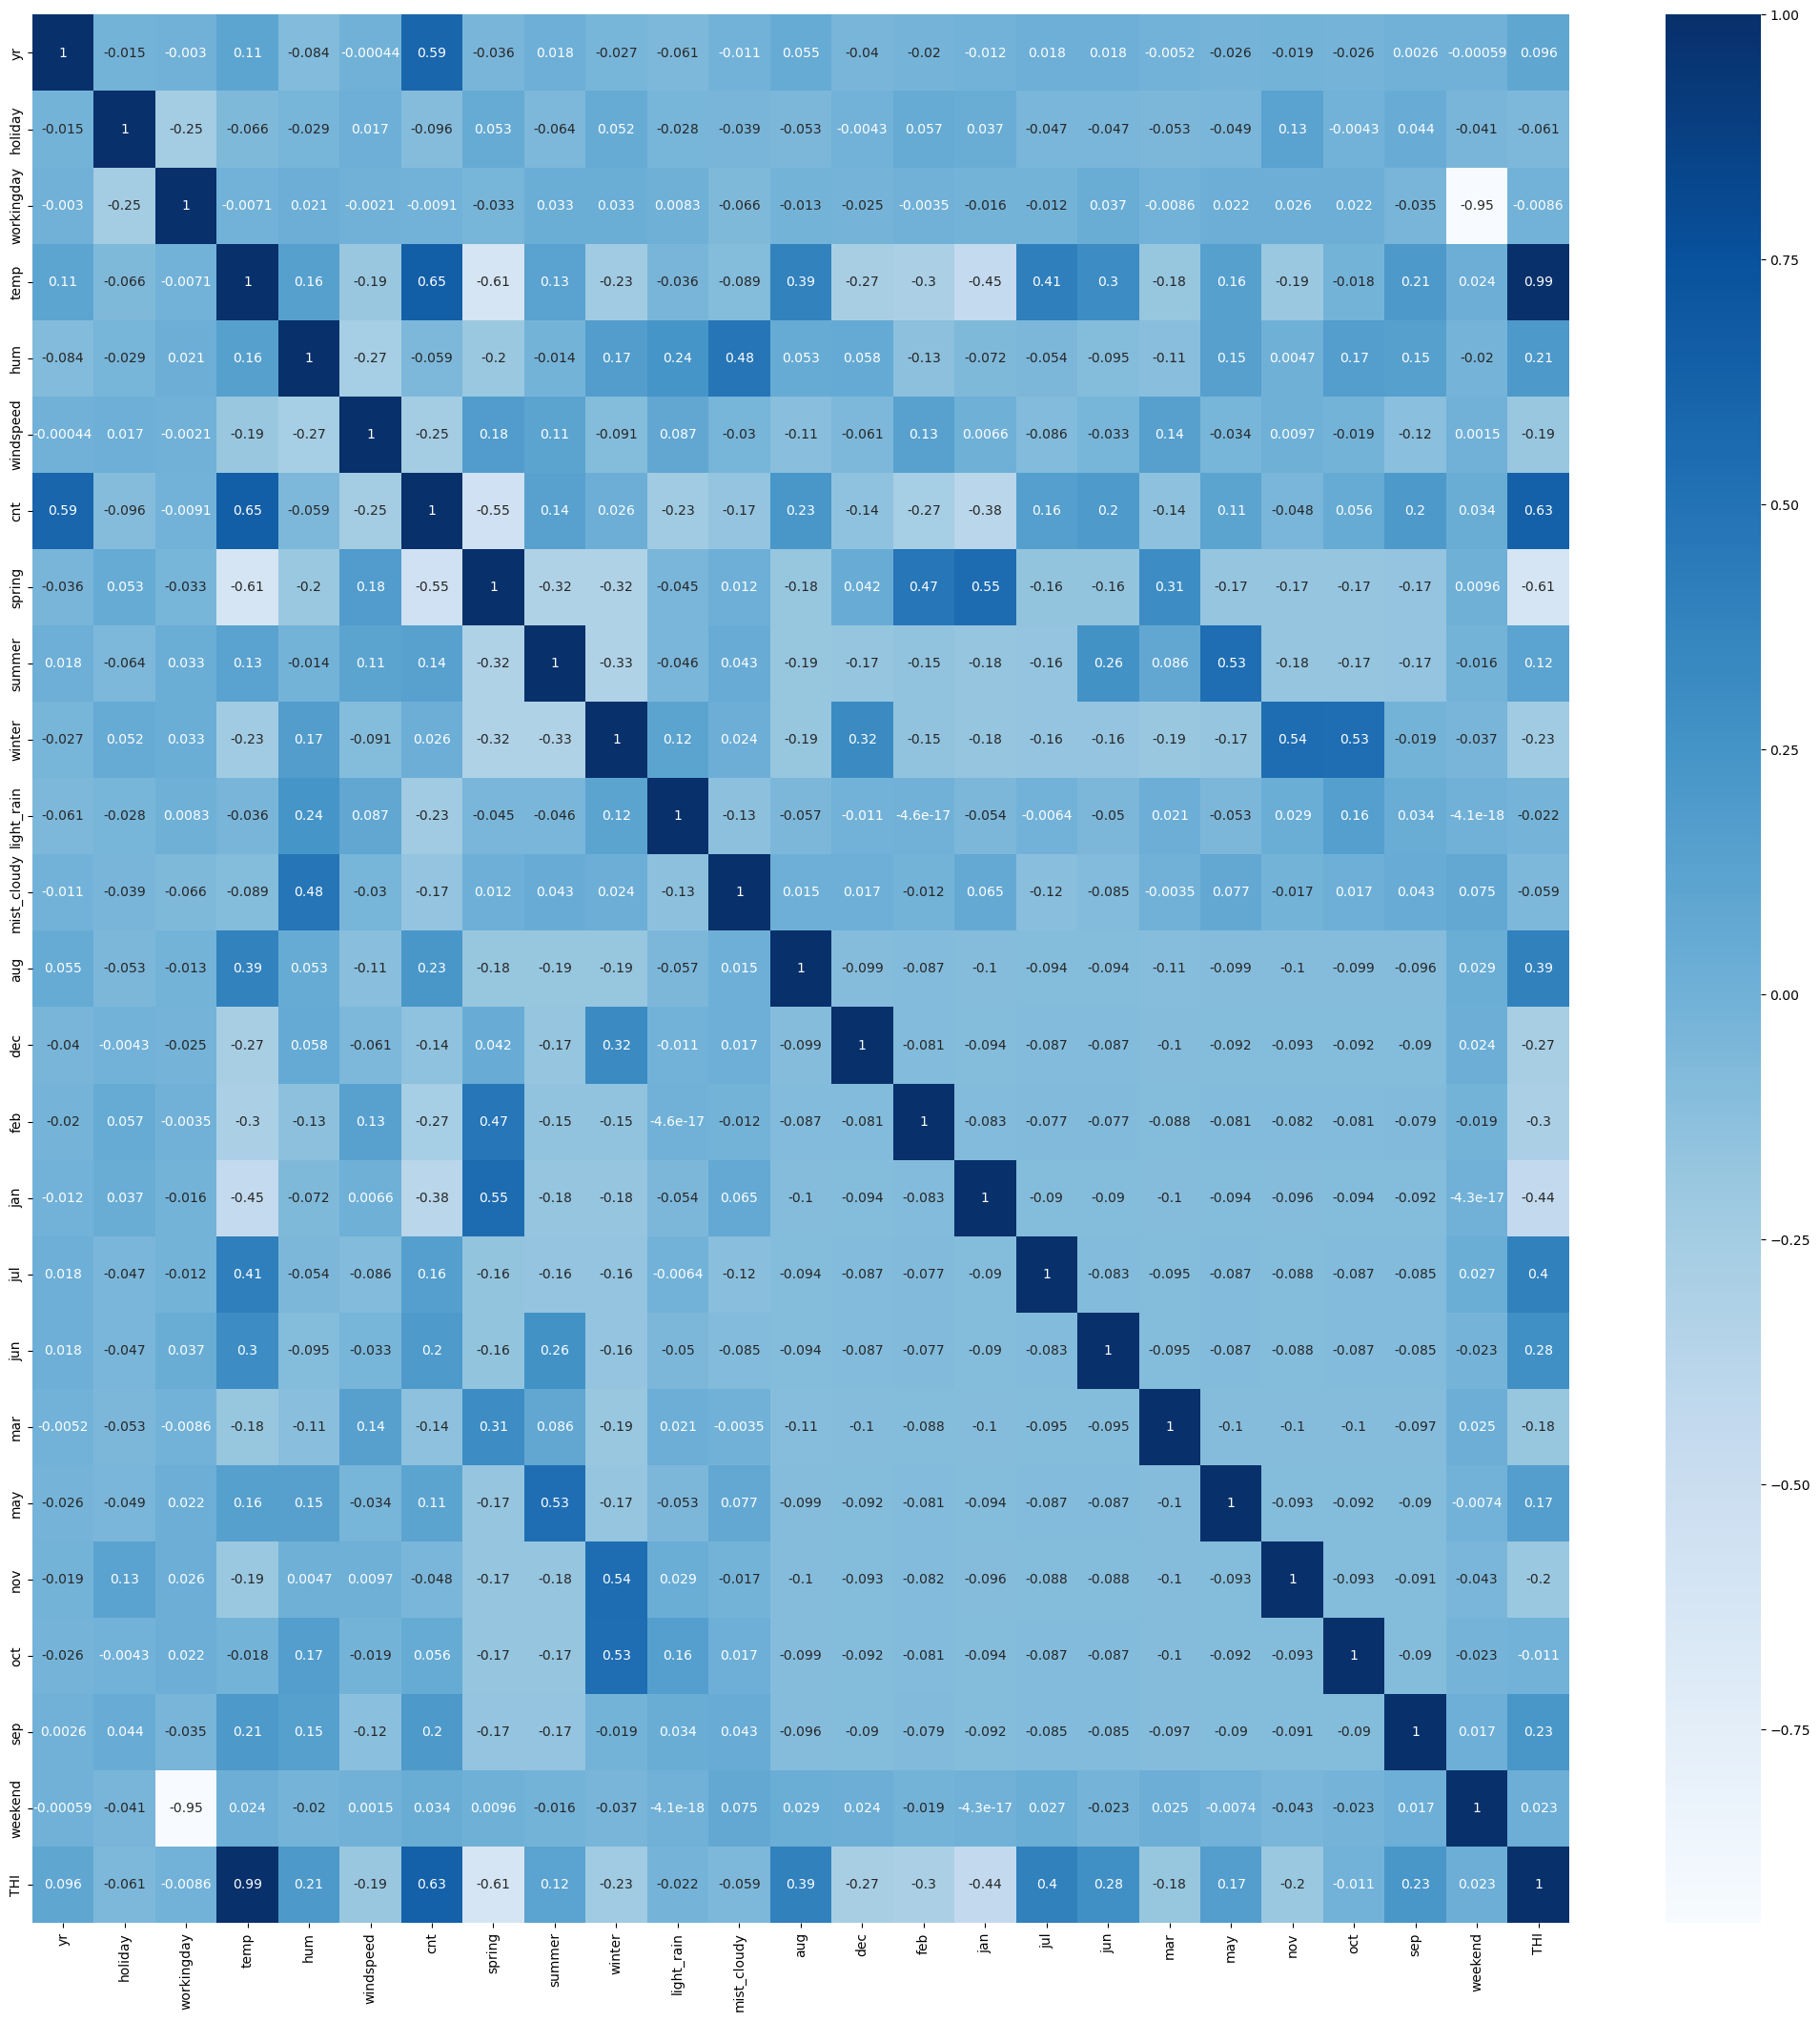

In [1262]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize=(26,26))

sns.heatmap(data_train.corr(),annot=True, cmap="Blues")
plt.show()
            

`temp` has the highest correlation to `cnt`. 

##### 1. Model building

In [1265]:
# Divding into X and y for model building

y_train = data_train.pop("cnt")
X_train = data_train

##### <span style="color:Green"> 1st Model </span>

Let's fit a line and check the parameteres pf the highest correlated predictors - `temp`

In [1268]:
# Add a constant
X_train_trial =sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr_1 = sm.OLS(y_train,X_train_trial).fit()

# Summary of the first model
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Mon, 30 Dec 2024   Prob (F-statistic):           2.46e-61
Time:                        01:13:41   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.0

`R-squared: 0.416` is not a good score with P(F-statistics) almost `0`.  `temp` variable is significant with 0 p-value. Lets add another predictor variable

##### <span style="color:Green"> 2nd Model </span>

In [1271]:
# 2nd model having 2nd highest correlated predictor
X_train_trial =sm.add_constant(X_train[['temp','THI']])
lr_2 = sm.OLS(y_train,X_train_trial).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     195.4
Date:                Mon, 30 Dec 2024   Prob (F-statistic):           1.21e-63
Time:                        01:13:41   Log-Likelihood:                 184.63
No. Observations:                 510   AIC:                            -363.3
Df Residuals:                     507   BIC:                            -350.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4328      0.066      6.522      0.0

**Improved** `R-squared`: 0.435, indicating that the model explains 43.5% of the variability in the dependent variable `cnt`. But THI is negatively corelated. Both the variables are significant as p-value is 0.

##### <span style="color:Green"> 3rd Model </span>

In [1274]:
# Taking all the variables into account for reference
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_3 = sm.OLS(y_train, X_train_lm).fit()

# Summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     113.4
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          1.20e-181
Time:                        01:13:42   Log-Likelihood:                 520.47
No. Observations:                 510   AIC:                            -990.9
Df Residuals:                     485   BIC:                            -885.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4237      0.089      4.756      

💡 **Initial Observations**
* `R-squared`: 0.849, indicating that the model explains ~85% of the variability in the dependent variable `cnt`
* `Adjusted R-squared`: 0.841, which is also extremely high and confirms the model's fit but not perfect.
* `F-statistic`: Very high (113.4) with a `p-value` of nearly `zero`, indicating that the model is statistically significant.
* There are many features, whose p-value is more than `0.05`, so futher I will deploy automatic feature selection technique, called **Recursive Feature Elimination (RFE)** and then do fine tuning of the model by manupulating features manually.

##### <span style="color:Green"> 4th Model </span>

In [1277]:
# Running RFE with the output number of the variable equal to 12
lm=LinearRegression()
lm.fit(X_train, y_train)

rfe= RFE(estimator=lm, n_features_to_select=12)
rfe= rfe.fit(X_train, y_train)

In [1278]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('light_rain', True, 1),
 ('mist_cloudy', True, 1),
 ('aug', False, 9),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('jul', True, 1),
 ('jun', False, 13),
 ('mar', False, 12),
 ('may', False, 8),
 ('nov', False, 3),
 ('oct', False, 11),
 ('sep', True, 1),
 ('weekend', False, 7),
 ('THI', False, 10)]

In [1279]:
# Filtering columns which are rank 1
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'light_rain', 'mist_cloudy', 'jul', 'sep'],
      dtype='object')

In [1280]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding constant variable in X_train_rfe
X_train_rfe = sm.add_constant(X_train_rfe)

lm_1 = sm.OLS(y_train, X_train_rfe).fit()

# Summary of the model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          2.95e-190
Time:                        01:13:42   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2848      0.034      8.258      

Now, let's check how each much the feature variables are correlated with each other

In [1282]:
# Dropping the const variable 
X_train_rfe = X_train_rfe.drop('const',axis=1)

In [1283]:
# Checking Variance Inflation Factor or VIF

vif = pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif


,Features,VIF
3,hum,28.03
2,temp,16.03
4,windspeed,4.65
5,spring,4.01
7,winter,3.33
6,summer,2.79
9,mist_cloudy,2.28
0,yr,2.08
10,jul,1.58
11,sep,1.38


All the 12 varaibles selceted through post deploying Recursive Feature Elimination method, has significance value `less 0.05`, however Varience Inflation factor of `hum` is very high. so, dropping **hum** variable and rebuilding the model.

##### <span style="color:Green"> 5th Model </span>

In [1286]:
# Dropping hum variable due to insignificance
X_train_rfe = X_train_rfe.drop('hum',axis=1)

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_rfe)

lm_2 = sm.OLS(y_train, X_train_lm).fit()

# Summary of 5th model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          5.06e-187
Time:                        01:13:42   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1994      0.030      6.746      

In [1287]:
# Checking Variance Inflation Factor or VIF

vif = pd.DataFrame()
X=X_train_rfe
vif['Features']=X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.23
4,spring,2.08
0,yr,2.07
6,winter,1.78
9,jul,1.58
8,mist_cloudy,1.55
10,sep,1.34
7,light_rain,1.08


Variable **temp** has `VIF` =`5.09`.This is fine, but dropping it to get more finner model. 

💡**Observations: 5th Model - Final Model**
* The values of R-squared and Adjusted R-squared are almost similar, which indicates that none of the selected features are redundant.
* `Variance Inflation Factor` for the remianing features are now within the acceptable range and `p-value` of all the trained variables are within `0.05`.

##### 2. Model Evaluation

##### <span style="color:Green"> Residual Analysis of the train data </span>

In [1292]:
# Making predictions on train dataset
y_train_pred = lm_2.predict(X_train_lm)

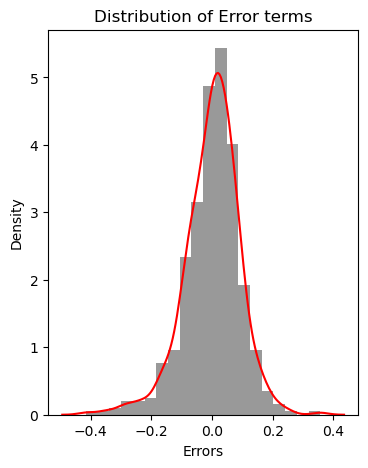

In [1293]:
# Ploting the error terms histogram
plt.figure(figsize=(4,5))
sns.distplot((y_train - y_train_pred),color='black', bins = 20,kde_kws={'color':'red'})
plt.title('Distribution of Error terms', fontsize = 12)                   
plt.xlabel('Errors', fontsize = 10)                         
plt.show()

Error terms are ditributed normally around `0`


Let's see if the error terms demonstatre **Homoscedasticity** or **Heteroscedasticity**

<function matplotlib.pyplot.show(close=None, block=None)>

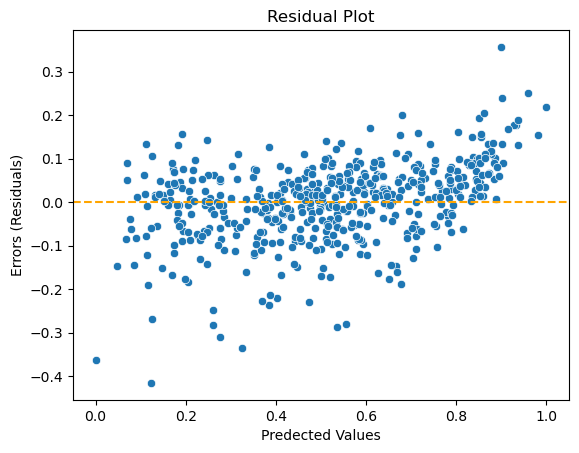

In [1296]:
# Let's find diferrence between the actual target value and the predicted value
res= y_train - y_train_pred

# Let's see the ditribution of the error terms 
sns.scatterplot(x=y_train, y=res)
plt.axhline(0,color='orange', linestyle ='--')
plt.title("Residual Plot")
plt.xlabel("Predected Values")
plt.ylabel("Errors (Residuals)")
plt.show

💡 **Observations: Model evaluation**
* As the error terms are randomly distributed around the horizontal line (zero) with no clear pattern (widening or narrowing), it has white nose or `homoscedasticity`. Or in other words, the varience of the residuals are constant across all the independent variables (Xi)
* Moreover, there is no cyclic pattern observed. So, the error terms are independent and doesn't have any correlation.

Text(0, 0.5, 'y_pred')

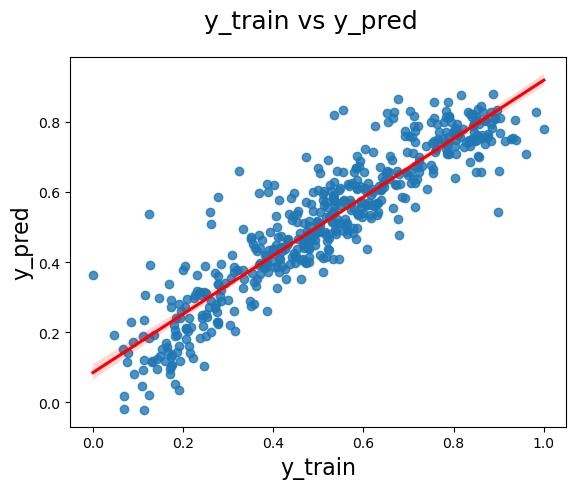

In [1298]:
# Plotting y_tain and y_train_pred to find linearity.
fig = plt.figure()
sns.regplot(x=y_train,y=y_train_pred,line_kws={"color":'red'})
fig.suptitle('y_train vs y_pred', fontsize=18)               
plt.xlabel('y_train', fontsize=16)                         
plt.ylabel('y_pred', fontsize=16)

##### <span style="color:Green"> Making Predictions </span>

In [1300]:
# Normalizing the data of the test sets
num_vars = ["temp","hum","windspeed","cnt"]

# Again applying MinMax scaler method to normalise the test data 
data_test[num_vars] = scaler.transform(data_test[num_vars])

In [1301]:
data_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,jan,jul,jun,mar,may,nov,oct,sep,weekend,THI
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.327273,19.533487
std,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.470288,6.006092
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.224681
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.196700
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.571954
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,25.083064
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.202997


In [1302]:
# Dividing into X_test and y_test

y_test = data_test.pop('cnt')
X_test = data_test

In [1303]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [1304]:
# Making predictions on test dataset
y_test_pred = lm_2.predict(X_test_new)

In [1305]:
# Calculating Mean Squared Error & r_squared value on test dataset
mse_test = mean_squared_error(y_test,y_test_pred)
r_squared_test = r2_score(y_test,y_test_pred)

In [1306]:
print(f" MSE value =",
      mse_test,
        "and 𝑅-squared value =",
        round(r_squared_test*100,2))


 MSE value = 0.009310968608097105 and 𝑅-squared value = 80.53


Text(0, 0.5, 'y_pred')

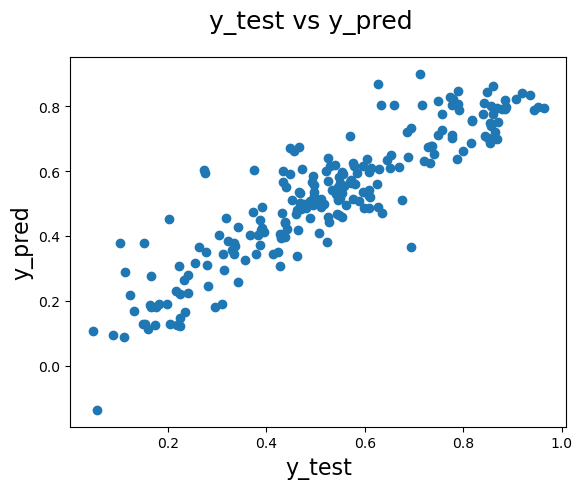

In [1307]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=18)               
plt.xlabel('y_test', fontsize=16)                         
plt.ylabel('y_pred', fontsize=16)                          

💡 **Observations: On Test Data**
* MSE value of 0.00931 suggests that the model's predictions are very close to the actual values and
* 𝑅-squared value of 80.53% indicates that a significant portion of the variability in the data is explained by the model

##### <span style="color:Green"> Model Evaluation </span>

Let's compare **r_squared values** of `X_train` & `X_test dataframes`

In [1311]:
# Calculating r_squared value on train dataset
r_squared_train = r2_score(y_train,y_train_pred)

In [1312]:
diff_r_squared = r_squared_train - r_squared_test
print(f"💡 Diffenece between r_squared values between train and test dataframe is", round(diff_r_squared *100,2), "% - this difference is quite minimum")

💡 Diffenece between r_squared values between train and test dataframe is 3.0 % - this difference is quite minimum


Text(0, 0.5, 'y_pred')

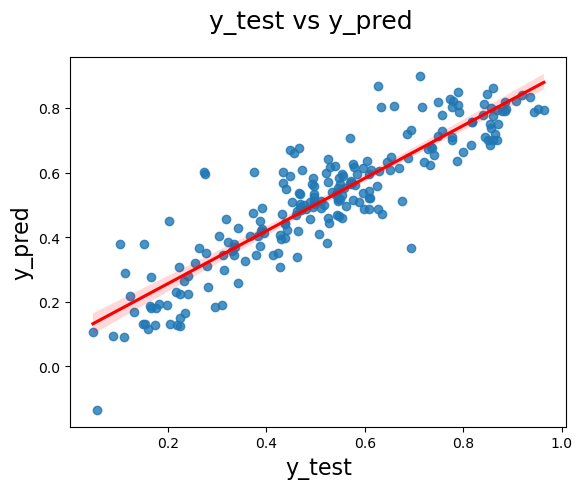

In [1313]:
# Plotting a regression plot between y_test and y_test_pred.
fig = plt.figure()
sns.regplot(x=y_test,y=y_test_pred,line_kws={"color":'red'})
fig.suptitle('y_test vs y_pred', fontsize=18)               
plt.xlabel('y_test', fontsize=16)                         
plt.ylabel('y_pred', fontsize=16)  

💡 **Observations: Model Evaluation**
* The points lie close to the regression line, indicating that the predicted values are close to the actual values. `Linearity` established.
* The points are `tightly clustered around the regression line`, it indicates a good fit, meaning the model predictions are accurate.
* The regression line is `almost 45 degree line`, indicating that the model is `unbiaded`.
* Points that are far from the regression line indicate `outliers`, which may suggest areas where the model will not perform well.

#### <span style="color:blue"> Final model information  </span>

In [1317]:
# Summary of final model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          5.06e-187
Time:                        01:13:46   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1994      0.030      6.746      

#### <span style="color:blue"> Answer to the Business question  </span>

##### Which variables are significant in predicting the demand for shared bike

* USA lies in the non-tropical zone, so the data also reflected that as `temperature increases` demand increases
* EDA suggesed rise in demandduring fall, but fall failed be qulify as the significant feature for model building. So, as per model, `summer` and `winter` has seen rising demands.
* Resonating with the EDA analysis, the model also consider sep as the month when the demand was high. So it is a good predictor.
* Year treand is showing rise in demand
* When weather condition is
  * Light Snow
  * Light Rain + Thunderstorm + Scattered clouds
  * Light Rain + Scattered clouds
  * Misty conditions (Cloudy, Broken clouds, Few clouds)
People were reluctunt to hike bikes.
* Spring season and july month shows decline in demand
* As windspeed increased people find it difficult to handle bikes, so the demand fell
* During holidays also people prefer staying at home, so demand decreased.

🔎💡**The most significant variables are Temperature, weather situation - "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds" and year.**

##### How well those variables describe the bike demands

* Temperature weights `0.4910` times
* Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds weights `-0.2942` times
* year weights `0.2336`times